In [1]:
# import kagglehub

# path = kagglehub.dataset_download("ealtman2019/ibm-transactions-for-anti-money-laundering-aml")

# print("Path to dataset files:", path)

In [2]:
import warnings  
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import sklearn.metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# from category_encoders import CountEncoder, TargetEncoder
from scipy.sparse import hstack

In [3]:
df = pd.read_csv('/Users/andrzej/python_programs/CODE/data/ibm-transactions-for-anti-money-laundering-aml/HI-Small_Trans.csv')
df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
0,2022/09/01 00:20,10,8000EBD30,10,8000EBD30,3697.34,US Dollar,3697.34,US Dollar,Reinvestment,0
1,2022/09/01 00:20,3208,8000F4580,1,8000F5340,0.01,US Dollar,0.01,US Dollar,Cheque,0
2,2022/09/01 00:00,3209,8000F4670,3209,8000F4670,14675.57,US Dollar,14675.57,US Dollar,Reinvestment,0
3,2022/09/01 00:02,12,8000F5030,12,8000F5030,2806.97,US Dollar,2806.97,US Dollar,Reinvestment,0
4,2022/09/01 00:06,10,8000F5200,10,8000F5200,36682.97,US Dollar,36682.97,US Dollar,Reinvestment,0


In [4]:
df.isnull().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

In [5]:
print(df.shape)
df = df.drop_duplicates(keep = 'first')
df.shape

(5078345, 11)


(5078336, 11)

In [6]:
df["Is Laundering"].value_counts()

Is Laundering
0    5073159
1       5177
Name: count, dtype: int64

In [7]:
percentages = df["Is Laundering"].value_counts(normalize=True)*100
percentages

Is Laundering
0    99.898057
1     0.101943
Name: proportion, dtype: float64

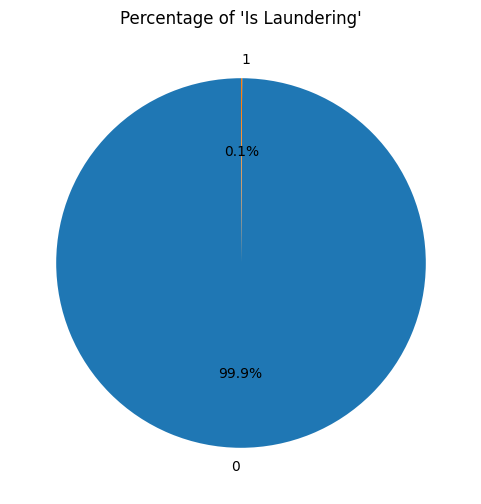

In [8]:
plt.figure(figsize=(6, 6))
percentages.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Percentage of 'Is Laundering'")
plt.ylabel("")
plt.savefig("is_laundering_pie_chart.png")
plt.show()


In [9]:
print(sorted(df['Receiving Currency'].unique()) == sorted(df['Payment Currency'].unique()))

True


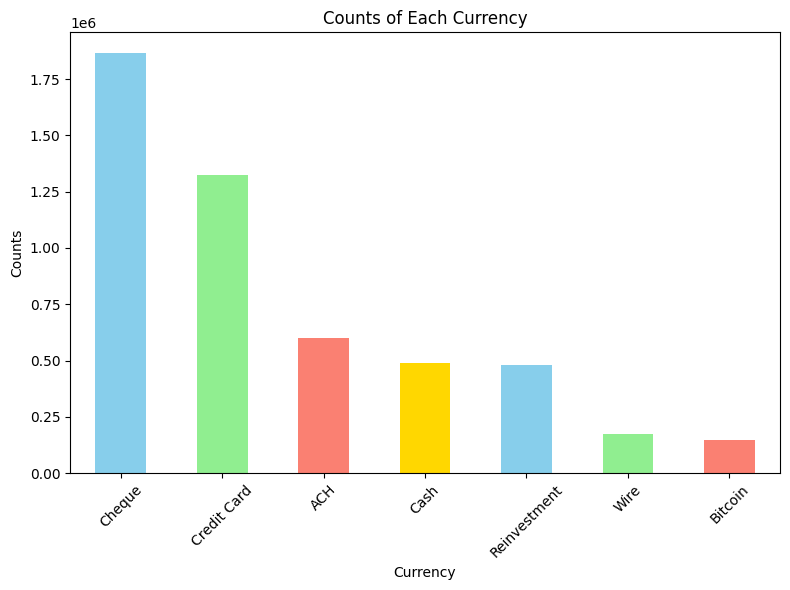

In [10]:
currency_counts = df['Payment Format'].value_counts()

plt.figure(figsize=(8, 6))
currency_counts.plot.bar(color=['skyblue', 'lightgreen', 'salmon', 'gold'])
plt.title('Counts of Each Currency')
plt.xlabel('Currency')
plt.ylabel('Counts')
plt.xticks(rotation=45)  
plt.tight_layout()

plt.savefig("currency_barplot.png")
plt.show()

In [11]:
print(df['Amount Received'].equals(['Amount Paid']))

False


In [12]:
df.dtypes

Timestamp              object
From Bank               int64
Account                object
To Bank                 int64
Account.1              object
Amount Received       float64
Receiving Currency     object
Amount Paid           float64
Payment Currency       object
Payment Format         object
Is Laundering           int64
dtype: object

In [13]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
# df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min())

In [14]:
# cat_cols = df.select_dtypes(include='object').columns.to_list()
# cat_cols

In [15]:
# le = LabelEncoder()
# for col in cat_cols:
#     df[col] = le.fit_transform(df[col])
# df

In [16]:
# df.info()

In [17]:
# scaler = MinMaxScaler()

In [18]:
# df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# df_scaled.info()

In [19]:
# time_val = df['Timestamp'].values
# time_val

In [20]:
# y = df_scaled['Is Laundering']
# X = df_scaled.drop('Is Laundering', axis=1)

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<!-- clf = IsolationForest(random_state=42).fit(X_train, y_train)
preds = clf.predict(X_test)
auprc = average_precision_score(y_test, preds)

print(f"AUPRC: {auprc}") -->

In [22]:
def data_preprocessing(df, n_components):
    df = df.drop('Is Laundering', axis=1)
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].apply(lambda x: x.value)
    df['Timestamp'] = (df['Timestamp'] - df['Timestamp'].min()) / (df['Timestamp'].max() - df['Timestamp'].min())

    cat_cols = df.select_dtypes(include='object').columns.to_list()
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

    num_transformer = Pipeline(steps=[
        # ('standard_scaler', StandardScaler()),
        ('minmax_scaler', MinMaxScaler())
    ])
    cat_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, num_cols),
            ('cat', cat_transformer, cat_cols)
        ]
    )

    X_preprocessed = preprocessor.fit_transform(df)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X_preprocessed)


    return X_preprocessed


In [23]:
# import torch
# import torch.nn as nn
# import torch.optim as optim

# class Autoencoder(nn.Module):
#     def __init__(self, input_dim):
#         super(Autoencoder, self).__init__()
#         # Encoder
#         self.encoder = nn.Sequential(
#             nn.Linear(input_dim, 32),
#             nn.ReLU(),
#             nn.Linear(32, 16),
#             nn.ReLU(),
#             nn.Linear(16, 8)
#         )
#         # Decoder
#         self.decoder = nn.Sequential(
#             nn.Linear(8, 16),
#             nn.ReLU(),
#             nn.Linear(16, 32),
#             nn.ReLU(),
#             nn.Linear(32, input_dim)
#         )
    
#     def forward(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded


In [36]:
from torch.utils.data import DataLoader, TensorDataset

X = data_preprocessing(df, 100)
y = df['Is Laundering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [37]:
clf = IsolationForest(random_state=42, contamination=0.001)
clf.fit(X_train)

preds = clf.predict(X_test)
preds = np.where(preds == 1, 0, 1)

auprc = average_precision_score(y_test, preds)

print(f"AUPRC: {auprc}") 

# contamination=0.01
# AUPRC: 0.0010276637812664218, 18 minut no PCA
# AUPRC: 0.0010276637812664218, 27 minut with PCA 50

# contamination=0.001
# AUPRC: 0.0010308057859879126, 26 minut no PCA


AUPRC: 0.0010308057859879126


In [38]:
print("Unikalne wartości w y_test:", np.unique(y_test))
print("Unikalne wartości w preds:", np.unique(preds))

Unikalne wartości w y_test: [0 1]
Unikalne wartości w preds: [0 1]


In [39]:
print("Rozkład w y_test:")
print(pd.Series(y_test).value_counts())

# 0    1014633
# 1       1035

Rozkład w y_test:
Is Laundering
0    1014633
1       1035
Name: count, dtype: int64


In [40]:
print("Rozkład w preds:")
print(pd.Series(preds).value_counts())

# contamination 0.01
# 0    1005524
# 1      10144

# contamination 0.001
# 0    1014684
# 1        984

Rozkład w preds:
0    1014684
1        984
Name: count, dtype: int64


In [41]:
# plt.title("Confusion Matrix:")
# cm=confusion_matrix(y_test, preds)
# sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
# plt.ylabel("Actual Values")
# plt.xlabel("Predicted Values")

In [42]:
cm=confusion_matrix(y_test, preds)
print("Confusion Matrix:")
print(cm)

# Confusion Matrix: 0.01
# [[1004505   10128]
#  [   1019      16]]

# Confusion Matrix: 0.001
# [[1013653     980]
#  [   1031       4]]

Confusion Matrix:
[[1013653     980]
 [   1031       4]]


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names=["Not Fraud", "Fraud"]))

# 0.001
#               precision    recall  f1-score   support

#    Not Fraud       1.00      1.00      1.00   1014633
#        Fraud       0.00      0.00      0.00      1035

#     accuracy                           1.00   1015668
#    macro avg       0.50      0.50      0.50   1015668
# weighted avg       1.00      1.00      1.00   1015668


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1014633
       Fraud       0.00      0.00      0.00      1035

    accuracy                           1.00   1015668
   macro avg       0.50      0.50      0.50   1015668
weighted avg       1.00      1.00      1.00   1015668



In [44]:
print("Accuracy Score:", accuracy_score(y_test, preds)*100)
print("Precision Score:",precision_score(y_test, preds)*100)
print("Recall Score:",recall_score(y_test, preds)*100)
print("F1 Score:", f1_score(y_test, preds)*100)

# 0.01
# Accuracy Score: 98.90249569741293
# Precision Score: 0.15772870662460567
# Recall Score: 1.5458937198067633
# F1 Score: 0.2862510063511942

# 0.001
# Accuracy Score: 99.80200222907486
# Precision Score: 0.40650406504065045
# Recall Score: 0.3864734299516908
# F1 Score: 0.396235760277365

Accuracy Score: 99.80200222907486
Precision Score: 0.40650406504065045
Recall Score: 0.3864734299516908
F1 Score: 0.396235760277365


In [45]:
# X_train_dense = X_train.toarray()
# X_test_dense = X_test.toarray()

In [46]:
# def sparse_to_dense_in_batches(sparse_matrix, batch_size):
#     for i in range(0, sparse_matrix.shape[0], batch_size):
#         yield sparse_matrix[i:i+batch_size].toarray()

# class SparseDataLoader:
#     def __init__(self, sparse_matrix, batch_size):
#         self.sparse_matrix = sparse_matrix
#         self.batch_size = batch_size
#         self.num_batches = (sparse_matrix.shape[0] + batch_size - 1) // batch_size

#     def __iter__(self):
#         return iter(sparse_to_dense_in_batches(self.sparse_matrix, self.batch_size))

#     def __len__(self):
#         return self.num_batches

In [47]:
# from torch.utils.data import DataLoader, TensorDataset

# # X = data_preprocessing(df)

# # X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# # X_train_dense = X_train.toarray()  # or X_train.todense() if it's a sparse matrix in scipy
# # X_test_dense = X_test.toarray()    # or X_test.todense()

# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# # X_train_tensor = torch.tensor(X_train_reduced, dtype=torch.float32)
# # X_test_tensor = torch.tensor(X_test_reduced, dtype=torch.float32)
# input_dim = X_train_tensor.shape[1]
# model = Autoencoder(input_dim)
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# num_epochs = 50
# batch_size = 64


# batch_size = 64
# train_loader = SparseDataLoader(X_train, batch_size)

# # Training loop
# for epoch in range(num_epochs):
#     model.train()
#     epoch_loss = 0

#     for batch_dense in train_loader:
#         batch_tensor = torch.tensor(batch_dense, dtype=torch.float32)
#         optimizer.zero_grad()
#         outputs = model(batch_tensor)
#         loss = criterion(outputs, batch_tensor)
#         loss.backward()
#         optimizer.step()
#         epoch_loss += loss.item()

#     print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_loader)}")



# # input_dim = X_train_tensor.shape[1]
# # model = Autoencoder(input_dim)
# # criterion = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001)

# # num_epochs = 50
# # batch_size = 64

# # # Tworzenie DataLoader dla treningu
# # train_dataset = TensorDataset(X_train_tensor)
# # train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# # # Trening modelu z DataLoader
# # for epoch in range(num_epochs):
# #     model.train()
# #     epoch_loss = 0

# #     for batch in train_loader:
# #         batch = batch[0]  # Wyciągnij dane z TensorDataset
# #         optimizer.zero_grad()
# #         outputs = model(batch)
# #         loss = criterion(outputs, batch)
# #         loss.backward()
# #         optimizer.step()
# #         epoch_loss += loss.item()
    
# #         print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_loader)}")
        
